### Vector data in Python

- Vector data represent Earth's surface using points, lines and polygons
- Vector elements can have attributes, e.g., *name* for a crop,  *population* for a city
- Usually smaller (filesize) than raster

We will use geopandas package to open, manipulate and write vector data sets.<br>
The image below shows the relation between *pandas* and *geopandas* (powered by *shapely*)
<html>
<img src="pandas_geopandas_relation.png" width=700/>
</html>
- Series and Dataframe
- GeoSeries and GeoDataframe

###  1. Data loading

In [46]:
# import the libraries - geopandas
import geopandas as gpd

In [47]:
# read crop fields ( brpgewaspercelen_definitief_2020_small and assign it to a variable named fields
fields = gpd.read_file('./data/brpgewaspercelen_definitief_2020_small.gpkg')

<AxesSubplot: >

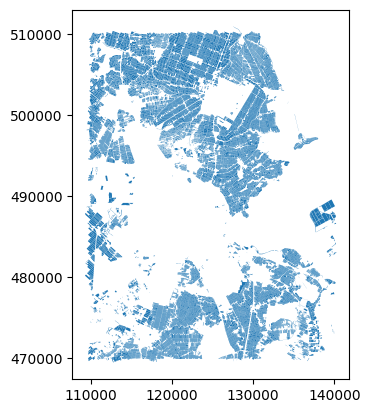

In [48]:
# plot the just opened data fields
fields.plot()

In [49]:
# show the data structure - list fields
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


In [53]:
# metadata - datatypes
fields.columns

Index(['category', 'gewas', 'gewascode', 'jaar', 'status', 'geometry'], dtype='object')

In [55]:
# display a series (category)
fields['geometry']

0        POLYGON ((117626.809 505287.535, 117622.930 50...
1        POLYGON ((117744.449 504313.788, 117746.064 50...
2        POLYGON ((117784.216 503525.695, 117789.021 50...
3        POLYGON ((117903.681 504159.929, 117908.257 50...
4        POLYGON ((118150.139 505369.637, 118168.010 50...
                               ...                        
22026    POLYGON ((139366.829 479190.018, 139391.354 47...
22027    POLYGON ((138750.889 478528.117, 138722.478 47...
22028    POLYGON ((139214.523 479446.287, 139104.402 47...
22029    POLYGON ((140196.363 479281.898, 140195.206 47...
22030    POLYGON ((139946.076 479297.442, 139941.657 47...
Name: geometry, Length: 22031, dtype: geometry

In [58]:
# filter by attribute (category=Grassland)
fields[fields.gewascode == 265]

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
8,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118532.784 504995.917, 118534.403 50..."
9,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118584.884 504538.258, 118611.598 50..."
...,...,...,...,...,...,...
22025,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139941.352 479256.022, 139942.981 47..."
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."


In [60]:
fields.dtypes

category       object
gewas          object
gewascode       int64
jaar            int64
status         object
geometry     geometry
dtype: object

In [62]:
# read a portion of a gdf - geopackage (rows=1), assign to a vraible fields_1row
fields_1row = gpd.read_file('./data/brpgewaspercelen_definitief_2020_small.gpkg', rows=1)

In [63]:
fields_1row

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."


In [66]:
fields_1row.shape, fields.shape

((1, 6), (22031, 6))

In [67]:
# get information of the CRS (gdf.crs)
fields.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [68]:
# get info about the spatial extent
fields.total_bounds

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

In [11]:
# read a portion of the gdf (bbox)

In [72]:
# define a bounding box/ assume this is known
xmin, xmax = (120000, 130000)
ymin, ymax = (490000, 500000)

In [73]:
# use the bbox to read the gdf - bbox=(xmin, ymin,xmax, ymax)
fields_box = gpd.read_file('./data/brpgewaspercelen_definitief_2020_small.gpkg', bbox=(xmin,ymin, xmax,ymax))

<AxesSubplot: >

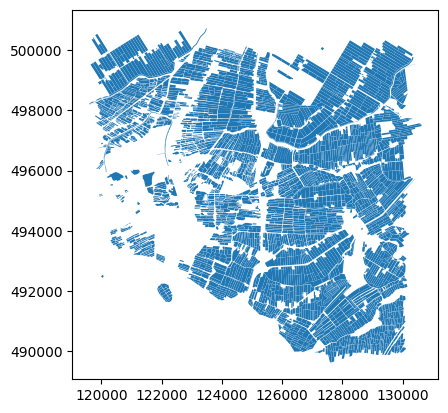

In [74]:
# plot the just read gdf
fields_box.plot()

In [75]:
fields_box.total_bounds

array([119594.384   , 489628.737125, 130638.544125, 500782.531   ])

**Note:** For simplicity, we assume the CRS and extent of the vector data is known.
You can use some online coordinates visualization tools to define a bbox.<br>
For example, [geojson.io](https://geojson.io) <br>
Some python tools, e.g., allows to inspect a data set without loading the full data set in memory


In [76]:
# example using fiona
import fiona

In [77]:
# read the file and assign the bounds and crs to variables
with fiona.open('./data/brpgewaspercelen_definitief_2020_small.gpkg') as f:
    bounds = f.bounds
    crs = f.crs

In [80]:
# show the content of variable
print(crs)

{'init': 'epsg:28992'}


## 2. Spatial queries
1. Using a spatial indexer

<AxesSubplot: >

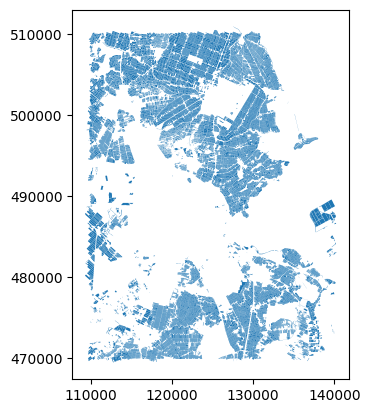

In [81]:
# first plot the fields
fields.plot()

In [82]:
# define an extent
xmin, xmax, ymin, ymax = (120000, 135000, 485000, 500000)

In [83]:
# use the coordinates-based indexer. The operator will retrieve the data intersecting with the bounding box defined by input gdf.cx[xmin:xmax, ymin:ymax]
fields_cx = fields.cx[xmin:xmax, ymin:ymax]

<AxesSubplot: >

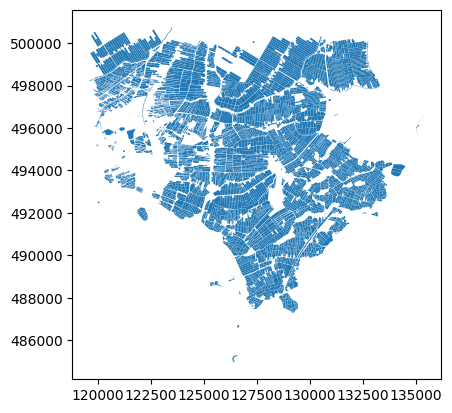

In [84]:
# plot the just filtered data
fields_cx.plot()

**Writing  files**

In [85]:
# save the cropped file to a shp file filename = fields_cropped.shp
fields_cx.to_file('./data/fields_cropped.shp')

**Note:** When saving shapefiles, several files are created, e.g., .shp, .dbf,.shx, etc. <br>
When opening such shapefile, all the files must be present.

In [86]:
# save the cropped file to a gpkg
fields_cx.to_file('./data/fields_cropped.gpkg')

Read another data set to perform some spatial queries

In [87]:
# read the wells dataset stored in brogmwvolledigeset.zip
wells = gpd.read_file('./data/brogmwvolledigeset.zip')

<AxesSubplot: >

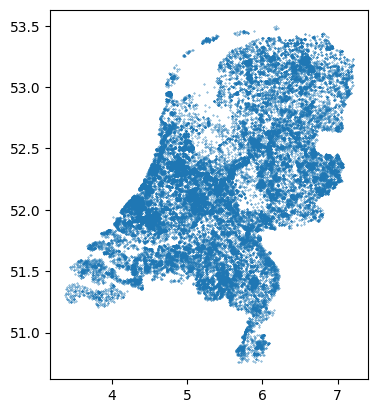

In [90]:
# plot the dataset specifying a markersize of 0.1
wells.plot(markersize=0.1)

In [91]:
# clip the wells using fields_cx (clip uses a polygon vector layer as a mask wells.clip(fields_cx)
wells_clip = wells.clip(fields_cx)

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:2262: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4258
Right CRS: EPSG:28992

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


In [93]:
# display wells CRS info
wells.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [94]:
fields_cx.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [95]:
# convert wells crs to fields_cx.crs
wells = wells.to_crs(fields_cx.crs)

In [96]:
# check again wells CRS info
wells.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [97]:
# try the spatial query again
wells_clip = wells.clip(fields_cx)

<AxesSubplot: >

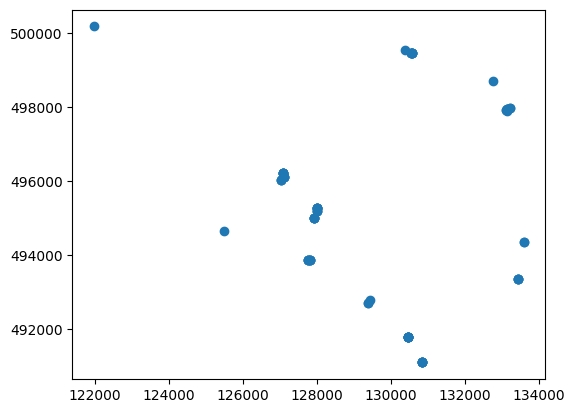

In [98]:
# plot the just created data
wells_clip.plot()

<AxesSubplot: >

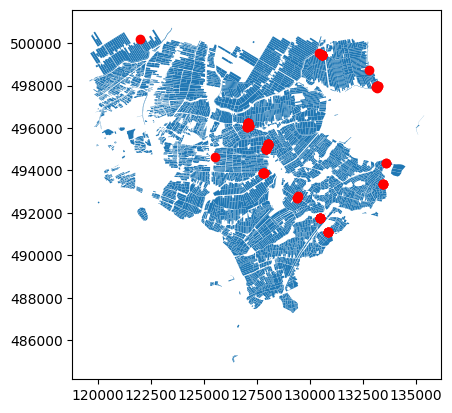

In [99]:
# plot the two data sets together
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fields_cx.plot(ax=ax)
wells_clip.plot(ax=ax, color='r')

**Note:** Afther this selection, all the well outside the fields_cx are dropped.<br>
If we want to keep some points in the neighboordhood of fields. We need a bigger polygon

In [100]:
# create a 50 units buffer around fields_cx, units 
buffer = fields_cx.buffer(50)

<AxesSubplot: >

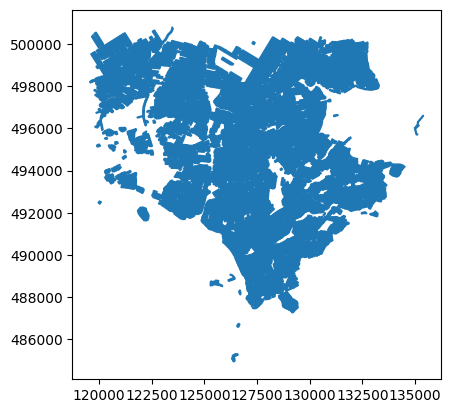

In [101]:
# plot the buffer
buffer.plot()

In [102]:
# clip the wells with the buffer
wells_clip_buffer = wells.clip(buffer)

<AxesSubplot: >

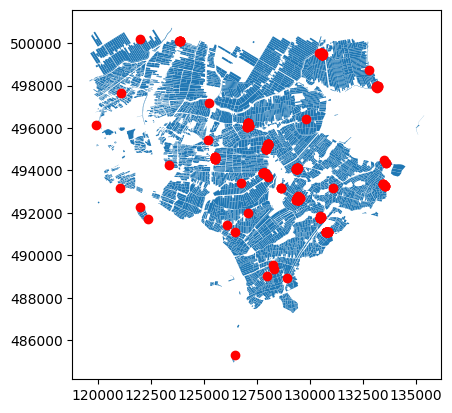

In [103]:
# plot the fields and the wells just clipped
fig, ax = plt.subplots()
fields_cx.plot(ax=ax)
wells_clip_buffer.plot(ax=ax, color='r')

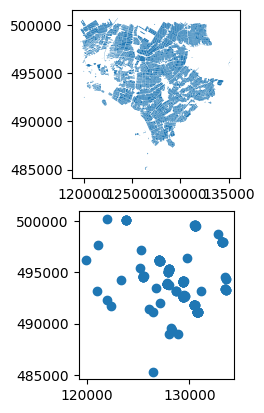

In [105]:
# visualize separately, create the fig.axes
fig, axes = plt.subplots(2,1)
for ax, geom in zip(axes, [fields_cx, wells_clip_buffer]):
    geom.plot(ax=ax)

In [106]:
# inspect the content of buffer
buffer

64       POLYGON ((119647.327 500387.521, 119648.866 50...
77       POLYGON ((120411.659 500059.824, 120412.615 50...
435      POLYGON ((121242.598 499139.608, 121237.180 49...
437      POLYGON ((121374.384 499899.553, 121371.741 49...
439      POLYGON ((121369.088 499805.591, 121369.106 49...
                               ...                        
21338    POLYGON ((133677.477 493274.771, 133672.053 49...
21339    POLYGON ((133450.676 493118.785, 133448.322 49...
21340    POLYGON ((133487.183 493354.640, 133484.355 49...
21429    POLYGON ((135010.378 496094.227, 135068.234 49...
21452    POLYGON ((135047.405 496000.571, 135048.225 49...
Length: 4872, dtype: geometry

In [107]:
# inpect the content of fields_cx
fields_cx

,category,gewas,gewascode,jaar,status,geometry
64,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119676.580 500347.036, 119823.955 50..."
77,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120631.197 499818.532, 120672.130 49..."
435,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121237.209 499189.398, 121256.425 49..."
437,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121425.502 49..."
439,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121418.811 499800.479, 121424.672 49..."
...,...,...,...,...,...,...
21338,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133630.043 493290.582, 133635.202 49..."
21339,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133572.822 493095.040, 133573.881 49..."
21340,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133480.387 493404.176, 133491.479 49..."
21429,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135049.220 496062.653, 135034.988 49..."


**Note:** clipping wells with the buffer can be expensive. <br>
Let's simplify the operation by using a single polygon --> we can use dissolve

In [108]:
# retain the buffer geom in fields_cx (copy the fields, inspect the content and replace the geom)
fields_buffer = fields_cx.copy()

In [109]:
# assign the geometry
fields_buffer['geometry'] = buffer
fields_buffer

,category,gewas,gewascode,jaar,status,geometry
64,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119647.327 500387.521, 119648.866 50..."
77,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120411.659 500059.824, 120412.615 50..."
435,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121242.598 499139.608, 121237.180 49..."
437,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121374.384 499899.553, 121371.741 49..."
439,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121369.088 499805.591, 121369.106 49..."
...,...,...,...,...,...,...
21338,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133677.477 493274.771, 133672.053 49..."
21339,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133450.676 493118.785, 133448.322 49..."
21340,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133487.183 493354.640, 133484.355 49..."
21429,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135010.378 496094.227, 135068.234 49..."


In [110]:
# create one single polygon with the buffer
fields_buffer_dissolve = fields_buffer.dissolve()
fields_buffer_dissolve

,geometry,category,gewas,gewascode,jaar,status
0,"MULTIPOLYGON (((126316.740 484988.771, 126316....",Grasland,"Grasland, blijvend",265,2020,Definitief


<AxesSubplot: >

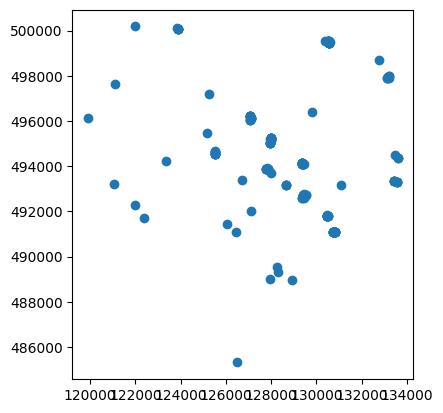

In [111]:
# clip the wells with dissolve_buffer and plot the result
wells_clip_buffer_dissolve = wells.clip(fields_buffer_dissolve)
wells_clip_buffer_dissolve.plot()

In [112]:
wells_clip_buffer_dissolve

,bro_id,delivery_accountable_party,quality_regime,with_prehistory,delivery_context,construction_standard,initial_function,removed,number_of_monitoring_tubes,groundlevel_stable,...,corrected,latest_correction_time,under_review,under_review_time,deregistered,deregistration_time,reregistered,reregistration_time,coordinate_transformation,geometry
24770,GMW000000031486,34366966,IMBRO/A,ja,publiekeTaak,NEN5766,stand,nee,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (126485.000 485318.001)
27014,GMW000000033529,34366966,IMBRO/A,ja,publiekeTaak,NEN5766,stand,nee,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (128922.999 488951.001)
19175,GMW000000024905,50200097,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (127959.999 489020.001)
51630,GMW000000054052,50200097,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (128300.000 489340.001)
25232,GMW000000031111,34366966,IMBRO/A,ja,publiekeTaak,onbekend,stand,nee,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (128241.000 489554.001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38510,GMW000000045972,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (123870.002 500090.002)
38380,GMW000000045935,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (123870.002 500090.002)
37374,GMW000000046405,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008MV0,POINT (123870.002 500090.002)
40793,GMW000000044120,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (123820.002 500100.002)


## Optional - time comparison between the two dissolve operations

In [45]:
import time
start_time = time.time()
wells_clip_buffer2 = wells.clip(fields_buffer_dissolve)
end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

NameError: name 'wells' is not defined

In [ ]:
start_time = time.time()
wells_clip_buffer = wells.clip(buffer)
end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

## Exercise: Clip fields within 500 m from wells.

This time, we will do a selection the other way around. Can you clip fields with the 500m buffer of wells? 
Please visualize the results. <br>

If you would like to load the two datasets again, use:
```
fields_cx = gpd.read_file("./data/fields_cropped.shp")
wells = gpd.read_file("./data/brogmwvolledigeset.zip")
```
- **Hint 1**: The wells object contains all the wells in the Netherlands. It might be too big to call .buffer() function directly on it. <br>
To improve the performance, first crop it with the bounding box of the fields.

- **Hint 2**: If you load the data again, do not forget the CRS conversion. The file *brogmwvolledigeset.zip* is in CRS 4326.

In [ ]:
fields_cx = gpd.read_file('./data/fields_cropped.shp')
wells = gpd.read_file('./data/brogmwvolledigeset.zip')

In [ ]:
# convert crs to 28992
wells = wells.to_crs(fields_cx.crs)

In [ ]:
# define a bbox using the total_bounds of fields /xmin,ymin /xmax,ymax
xmin, ymin, xmax, ymax = fields_cx.total_bounds

In [ ]:
# use cx to filter the wells with previously defined bbox. cx uses slices [xmin:xmax,ymin:ymax]
# this is to limit the extension to fields
wells_cx = wells.cx[xmin-500:xmax+500, ymin-500:ymax+500]

In [ ]:
wells_cx.plot()

In [ ]:
# create buffers for each well
buffer_wells_cx = wells_cx.buffer(500)

In [ ]:
# plot the just created dataset
buffer_wells_cx.plot()

In [ ]:
# clip the fields using the buffer of wells
fields_within_buffer_wells_cx = fields_cx.clip(buffer_wells_cx)

In [ ]:
fields_within_buffer_wells_cx.plot()

In [ ]:
fields_within_buffer_wells_cx

In [ ]:
# measuring area
fields_within_buffer_wells_cx.area

In [ ]:
buffer_wells_cx.plot()

In [ ]:
fields_cx.plot()

In [ ]:
# we need two dataframes for this 
# create a df with the buffers
gdf_buffer_wells = wells_cx.copy()

In [ ]:
# add the buffer geometry as we did before
gdf_buffer_wells['geometry'] = buffer_wells_cx

In [ ]:
# plot the recently created data set
gdf_buffer_wells.plot()

In [ ]:
# inspect shape of gdfs
fields_cx.shape, gdf_buffer_wells.shape

In [ ]:
# perform the sjoin
fields_within_buffer_wells_cx2 = fields_cx.sjoin(gdf_buffer_wells)

In [ ]:
# inspect the number of records
fields_within_buffer_wells_cx2.shape

In [ ]:
# plot the results
fields_within_buffer_wells_cx2.plot()

In [ ]:
# removed duplicates by filterinf the result with unique indexes from fields
# get the id from the buffer data set
idx = fields_within_buffer_wells_cx2.index.unique()

# filter fields_cx using the indexes
fields_in_buffer = fields_cx.iloc[idx]
# plot the result
fields_in_buffer.plot()

## Key points
- Load data 
- Plot spatial objects
- Crop spatial data
- Convert CRS of spatial objects
- Create a buffer
- Select spatial objects 
- Merge overlapping features